In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('diabetes.csv')

In [3]:
dataframe.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataframe.shape

(768, 9)

In [5]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
x = dataframe.iloc[:,:-1].values

In [7]:
y = dataframe.Outcome

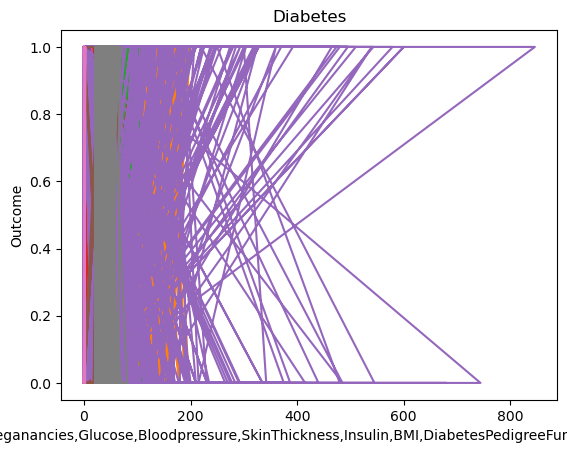

In [8]:
plt.plot(x,y)
plt.xlabel('Preganancies,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age')
plt.ylabel('Outcome')
plt.title('Diabetes')
plt.show()

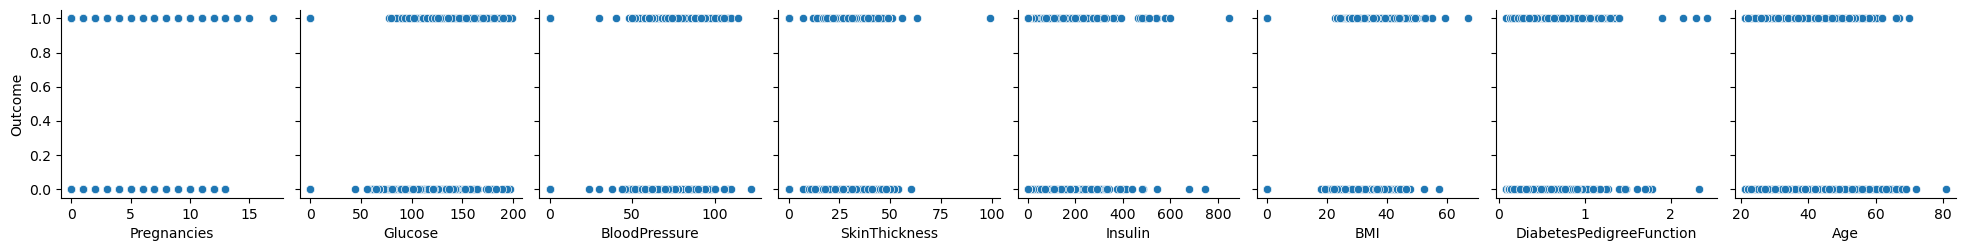

In [9]:
sns.pairplot(dataframe,x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],y_vars ='Outcome',kind ='scatter',diag_kind = None)

In [10]:
import sklearn
from sklearn.cluster import KMeans

Text(0, 0.5, 'BloodPressure')

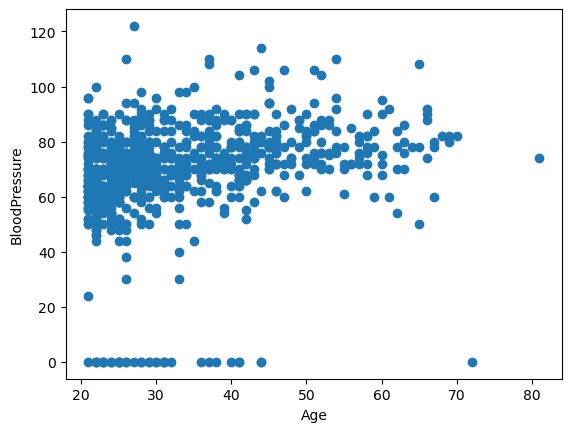

In [11]:
plt.scatter(dataframe.Age,dataframe['BloodPressure'])
plt.xlabel('Age')
plt.ylabel('BloodPressure')

In [12]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(dataframe[['Age','BloodPressure']])


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [13]:
y_predicted

array([0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2,

In [14]:
dataframe['cluster']= y_predicted
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


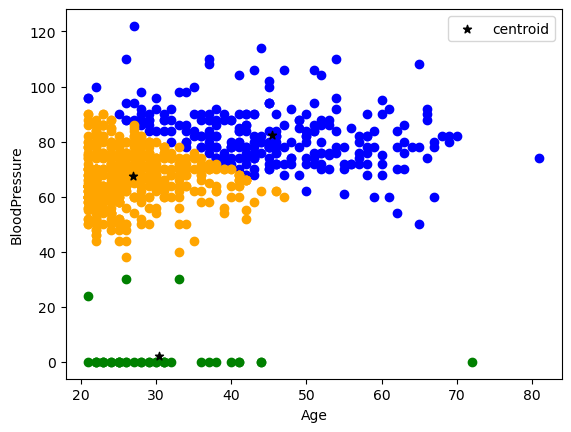

In [15]:
km.cluster_centers_



df1 = dataframe[dataframe.cluster==0]
df2 = dataframe[dataframe.cluster==1]
df3 = dataframe[dataframe.cluster==2]
plt.scatter(df1.Age,df1['BloodPressure'],color='blue')
plt.scatter(df2.Age,df2['BloodPressure'],color='orange')
plt.scatter(df3.Age,df3['BloodPressure'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.legend()

In [16]:
p = dataframe.iloc[:,[8,3]].values

In [17]:
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,16):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(p)
    wcss_list.append(kmeans.inertia_)



C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [18]:
wcss_list

[195355.45833333346,
 49714.26598290599,
 21671.583767873544,
 11680.110502516989,
 8368.098962705348,
 5677.93010422915,
 3754.355301209832,
 2734.459757210274,
 2176.576551070114,
 1693.9105700560608,
 1321.8750990661401,
 1146.6095748789705,
 985.2222054919786,
 829.304335580189,
 753.6826236023965]

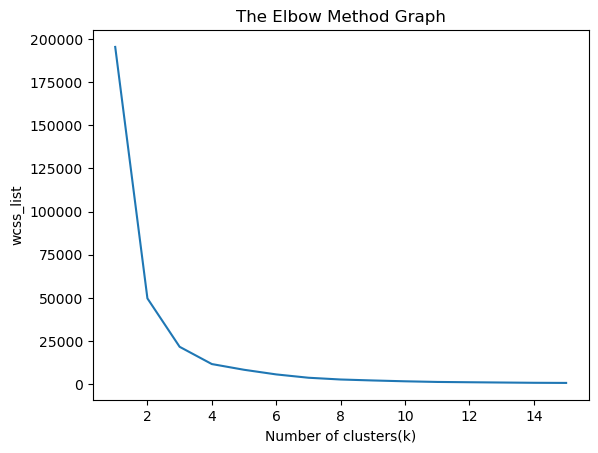

In [19]:
plt.plot(range(1,16),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()